In [25]:
import pandas as pd
import statsmodels.api as sm
from scipy.signal import savgol_filter

In [36]:
time=5
np.sin(time)*np.exp(time)

-142.31698094290323

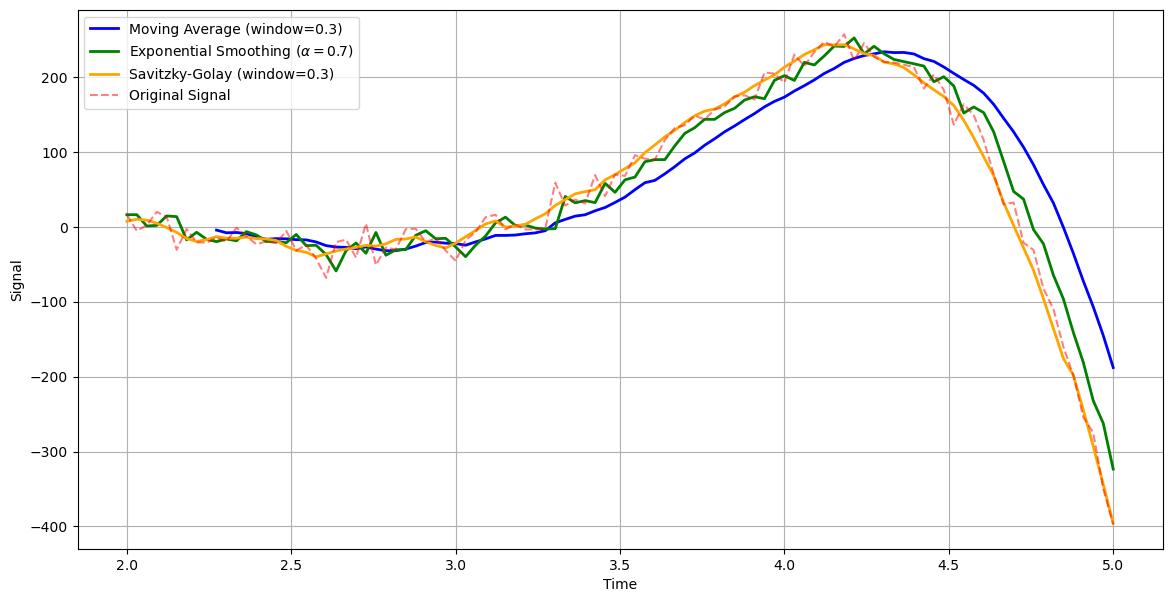

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility
a = 2
b = 5
density = 100
time = np.linspace(a, b, density)
signal = np.sin(2*time)*np.exp(time)*time + np.sin(0.5 * time) + np.random.normal(scale=15, size=len(time))

# moving
window_size = 10
df = pd.DataFrame({'Time': time, 'Signal': signal})
df['Moving_Average'] = df['Signal'].rolling(window=window_size).mean()

# exp
sl = 0.7
model = sm.tsa.SimpleExpSmoothing(df['Signal'])
fitted_model = model.fit(smoothing_level=sl, optimized=False)
df['Exponential_Smoothing'] = fitted_model.fittedvalues

# SG
ws = 10
ord = 3 
df['SG'] = savgol_filter(df['Signal'], window_length=ws, polyorder=ord)
    

plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['Moving_Average'], label=f'Moving Average (window={(b-a)/density*window_size})', color='blue', linewidth=2)
plt.plot(df['Time'], df['Exponential_Smoothing'], label=r'Exponential Smoothing ($\alpha=$'+f'{sl})', color='green', linewidth=2)
plt.plot(df['Time'], df['SG'], label=f'Savitzky-Golay (window={(b-a)/density*ws})', color='orange', linewidth=2)
plt.plot(df['Time'], df['Signal'], label='Original Signal', color='red', linestyle='--', alpha=0.5)
# plt.title('Moving Average of a Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()


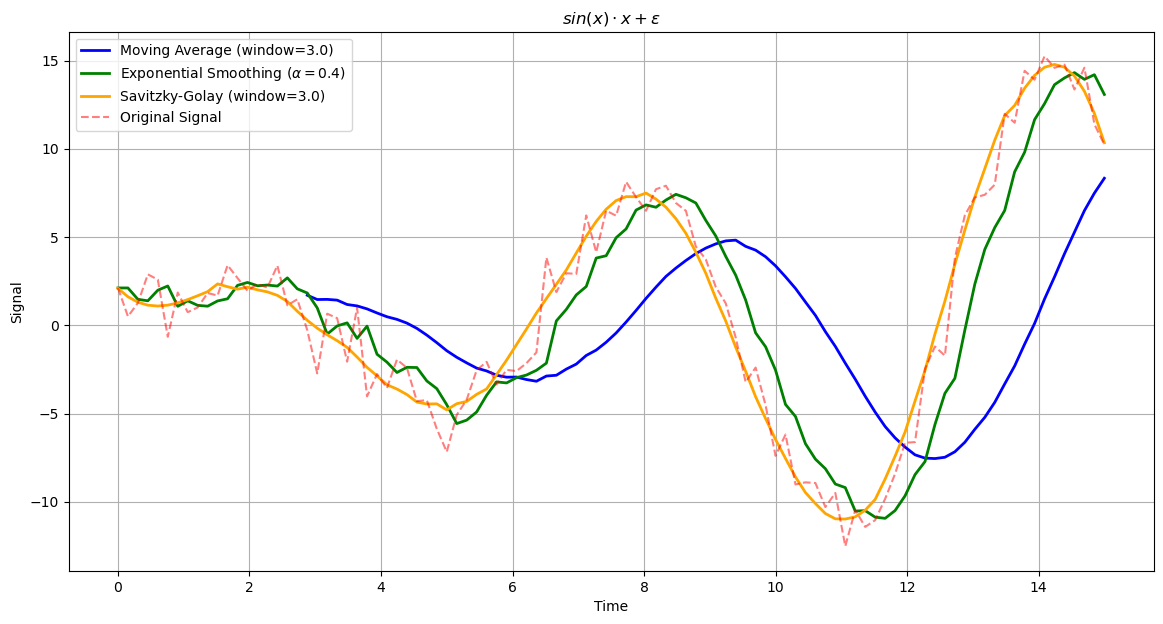

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility
a = 0
b = 15
density = 100
time = np.linspace(a, b, density)
signal = np.sin(time)*time + np.random.normal(scale=1.2, size=len(time))

# moving
window_size = 20
df = pd.DataFrame({'Time': time, 'Signal': signal})
df['Moving_Average'] = df['Signal'].rolling(window=window_size).mean()

# exp
sl = 0.4
model = sm.tsa.SimpleExpSmoothing(df['Signal'])
fitted_model = model.fit(smoothing_level=sl, optimized=False)
df['Exponential_Smoothing'] = fitted_model.fittedvalues

# SG
ws = 20
ord = 3 
df['SG'] = savgol_filter(df['Signal'], window_length=ws, polyorder=ord)
    

plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['Moving_Average'], label=f'Moving Average (window={(b-a)/density*window_size})', color='blue', linewidth=2)
plt.plot(df['Time'], df['Exponential_Smoothing'], label=r'Exponential Smoothing ($\alpha=$'+f'{sl})', color='green', linewidth=2)
plt.plot(df['Time'], df['SG'], label=f'Savitzky-Golay (window={(b-a)/density*ws})', color='orange', linewidth=2)
plt.plot(df['Time'], df['Signal'], label='Original Signal', color='red', linestyle='--', alpha=0.5)
plt.title(r'$sin(x) \cdot x + \varepsilon$')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()
